In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing_data = datasets.load_boston()
X = housing_data.data
y = housing_data.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=42)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=42)

In [12]:
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
evs_dt = explained_variance_score(y_test, y_pred_dt)

y_pred_ab = ab_regressor.predict(X_test)
mse_ab = mean_squared_error(y_test, y_pred_ab)
evs_ab = explained_variance_score(y_test, y_pred_ab)

print "#### Decision Tree performance ####"
print "Mean squared error =      ", round(mse_dt, 2)
print "Explained variance score =", round(evs_dt, 2)

print "\n\n#### AdaBoost performance ####"
print "Mean squared error =      ", round(mse_ab, 2)
print "Explained variance score =", round(evs_ab, 2)

#### Decision Tree performance ####
Mean squared error =       10.64
Explained variance score = 0.86


#### AdaBoost performance ####
Mean squared error =       10.93
Explained variance score = 0.85


In [13]:
print dt_regressor.feature_importances_
print ab_regressor.feature_importances_

[ 0.04949231  0.          0.          0.          0.02251099  0.6440964
  0.00746843  0.06891025  0.          0.          0.          0.
  0.20752161]
[ 0.03500805  0.00187644  0.01493102  0.0024917   0.04722433  0.22051167
  0.00867266  0.11958781  0.02059789  0.05290677  0.05729264  0.02475991
  0.39413912]


In [14]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)

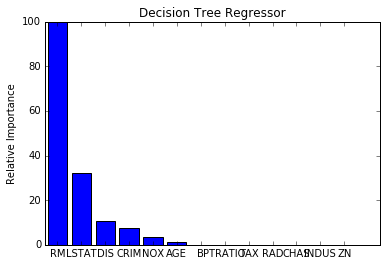

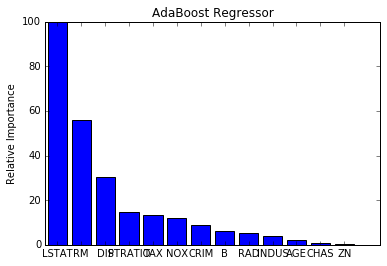

In [15]:
plot_feature_importances(dt_regressor.feature_importances_, "Decision Tree Regressor", housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, "AdaBoost Regressor", housing_data.feature_names)